### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None) # default 50
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [6]:
data_dict = pd.read_excel('Leads Data Dictionary.xlsx', header=2)
data_dict = data_dict.iloc[:,1:]
data_dict = data_dict.set_index('Variables')
data_dict = data_dict.fillna(method='ffill')
data_dict

,Description
Variables,
Prospect ID,A unique ID with which the customer is identified.
Lead Number,A lead number assigned to each lead procured.
Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
Converted,The target variable. Indicates whether a lead has been successfully converted or not.
TotalVisits,The total number of visits made by the customer on the website.
Total Time Spent on Website,The total time spent by the customer on the website.


In [20]:
(df := pd.read_csv('Leads.csv')).head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [29]:
f'{x:8}' 

'      10'

In [25]:
x

10

## Head, shape, info

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.shape

(9240, 37)

# Exploratory Data Analysis

## Missing Values

### Replacing occurences of 'Select' with NaN
Many of the categorical variables have a level called 'Select' which is a null value. It corresponds to a situation where a user, while filling an online form didn't select any options from a dropdown menu.

In [7]:
df = df.replace('Select', np.nan)

### Plotting missing value plots

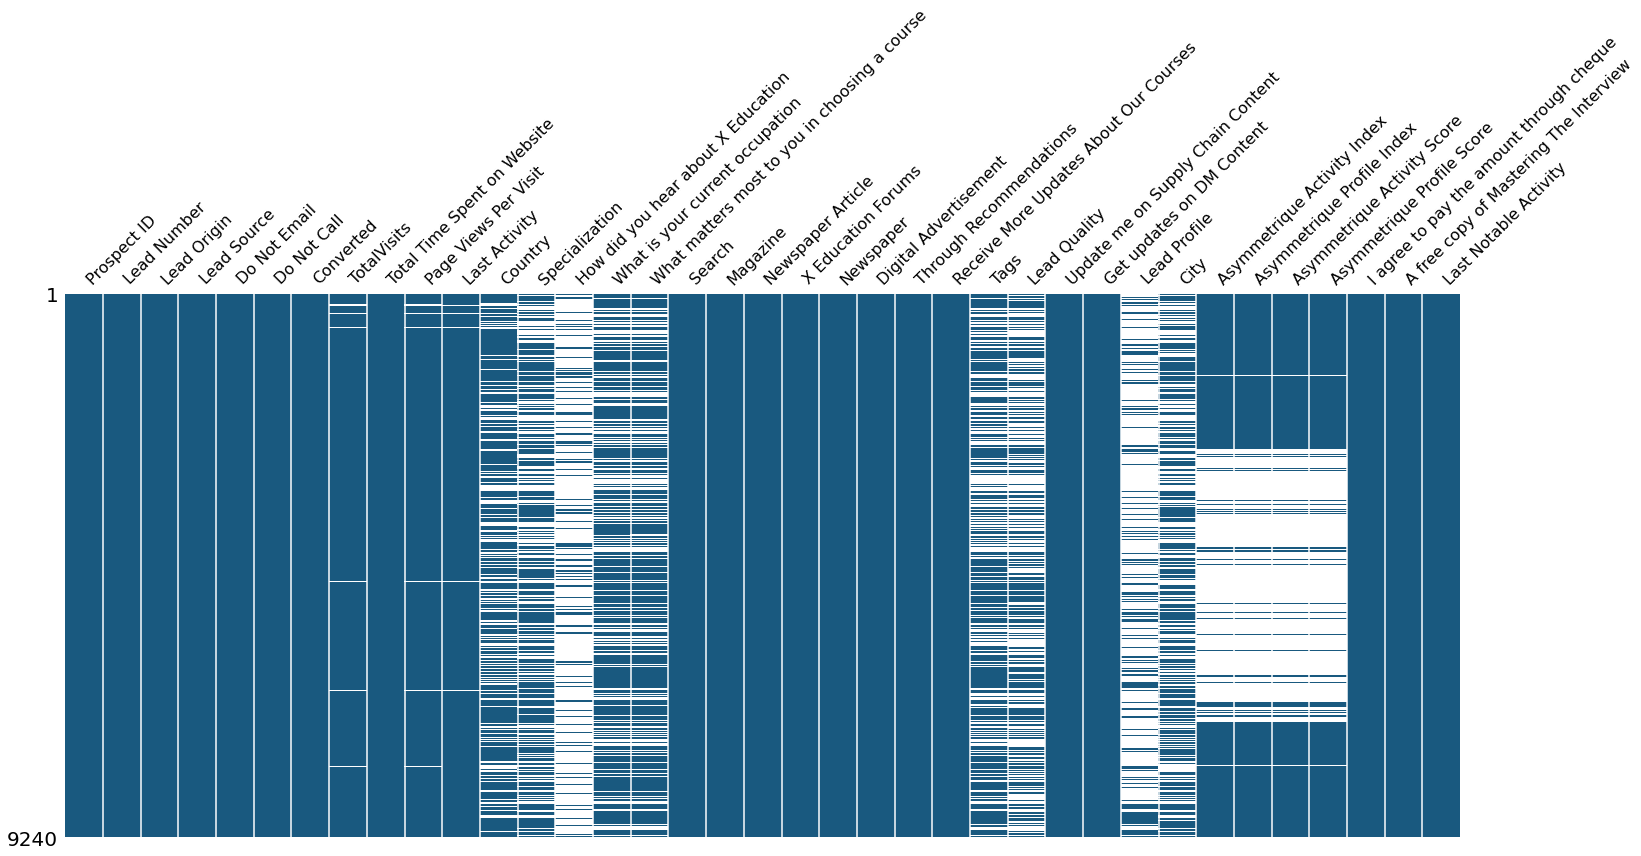

In [8]:
import missingno as msno
color = .1, 0.35, 0.5
msno.matrix(df, sparkline=False, color=color);

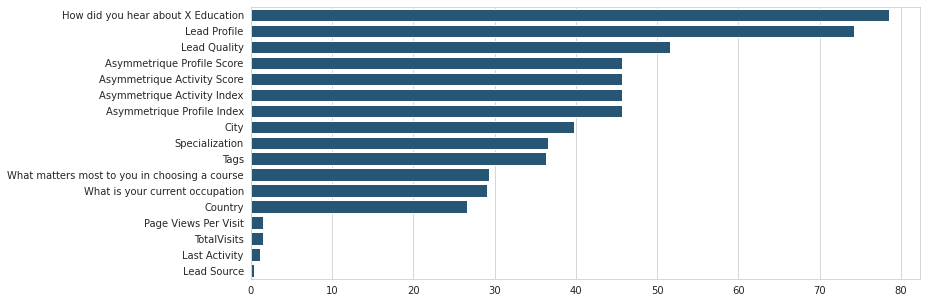

In [9]:
nans = df.isna().sum().sort_values(ascending=False)/len(df)*100
nans = nans[~(nans==0)] #removing 0s
sns.set_style(style='whitegrid')
with sns.plotting_context(font_scale=0.6):
    plt.figure(figsize=[12,5])
    sns.barplot(x = nans, y = nans.index, color=color)
    plt.show()

## Univariate Analysis (first pass)
Inspect each column and take appropriate actions like  
- Dropping useless columns
- Creating dummy variables
- Cleaning values, converting into appropriate dtypes

### Plotting functions

In [10]:
def value_counts(series: 'pd.Series'):
    """
    Outputs value counts of a pandas Series in the form
    of a nice Dataframe.
    """
    total_rows, nans = series.shape[0], series.isna().sum()
    counts = pd.DataFrame(series.value_counts())
    counts = pd.DataFrame(index=['NaNs'], columns=counts.columns,
                          data=[nans]).append(counts)
    counts_norm = pd.DataFrame(counts / total_rows)
    df = pd.merge(counts, counts_norm, left_index=True, right_index=True)
    df.columns = pd.MultiIndex.from_arrays(
        [[series._name, series._name],
         ['Counts', 'Normalised']])
    return df
city = value_counts(df['City'])
city

City           
                            Counts Normalised
NaNs                          3669   0.397078
Mumbai                        3222   0.348701
Thane & Outskirts              752   0.081385
Other Cities                   686   0.074242
Other Cities of Maharashtra    457   0.049459
Other Metro Cities             380   0.041126
Tier II Cities                  74   0.008009

In [11]:
cols = df.columns.drop(['Prospect ID', 'Lead Number'])

In [12]:
import ipywidgets as widgets
from ipywidgets import VBox, HBox, interactive_output
from IPython.display import clear_output
sns.set_theme('notebook', palette='turbo')
col = widgets.Dropdown(
        options=cols,
        description='Column',
        disabled=False)
def f(col):
    print(f'Description of {col}')
    print(str(df[col].describe()))
def g(col):
    plt.figure(dpi=90)
    sns.scatterplot(y=df[col].value_counts(),x=df[col].value_counts().index)
    plt.title('Value Counts')
    plt.xticks(rotation=90)
    plt.show()
def h(col):
    display(value_counts(df[col]), )
def i(col):
    try: print(data_dict.loc[col].values[0])
    except: print(col)

def j(col):
    try:
        plt.figure(dpi=90)
        plt.xticks(rotation=90)
        sns.histplot(df[col], kde=True)
        plt.plot()
    except: return 'Unsupported Data for Univariate distplot'
hist_button = widgets.Button(description='View Distribution')
histogram = widgets.Output()
def on_button_clicked(_):
      with histogram:
          clear_output()
          display(interactive_output(j, {'col':col}))
hist_button.on_click(on_button_clicked)

describe =         interactive_output(f, {'col': col})
value_count_plot = interactive_output(g,{'col':col})
value_counts_ =     interactive_output(h,{'col':col})
line =             widgets.Output(layout={'border': '1px solid black'})
description =      interactive_output(i, {'col':col})

### Widget

In [13]:
HBox([VBox([col, describe, line,value_counts_],box_style='info'),
      line,
      VBox([description, line,value_count_plot, line, hist_button, histogram]) ])

### Actions

- `Prospect ID` : It's an unique string, **dropping**. 
- `Lead Number` : It's an unique id, **dropping it**.
- `Lead Origin` : *'Quick Add Form'* method was used by a single user, replacing it with *'Lead Add Form'*.  
- `Lead Source` : It has various levels which can be combined together based on meaning. We will try bin them based on the ratio of succesfull conversions. 
- `Do Not Email` : Its too unbalanced (92%), **dropping**.
- `Do Not Call` : Its too unbalanced (99.9%), **dropping**.
- `Converted` : Its the **target variable**.
- `TotalVisits` : The data is very skewed, **Later:** transform it to make it look more normal.
- `Total Time Spent on Website` : The data is very skewed, **Later:** transform it to make it look more normal.
- `Page Views Per Visit` : The data is very skewed, **Later:** transform it to make it look more normal.
- `Last Activity` : *Variable not relevant* **dropping it**
- `Country` : 26% values are NaN, but rest of the values are 95% *'India'*, hence imputing NaNs with it.
- `Specialization` : 36% are NaNs hence **dropping it**. Later: impute missing values and add to model for better performance.
- `How did you hear about X Education` : 78% NaNs hence **dropping it**.
- `What is your current occupation` : 30% are NaNs and rest 60% are *'Unemployed'*; imputing NaNs with mode
- `What matters most to you in choosing a course` : This column has only 3 rows which are not *'Better Career Prospects'* or NaNs hence **dropping it**.  Later: impute missing values and add to model for better performance.
- `Search` : Highly imbalanced (99.8%) hence **dropping it**.  Later: impute missing values and add to model for better performance.
- `Magazine` : Whole column is a single value hence **dropping it**. 
- `Newspaper Article` : Highly imbalanced (99.99%) hence **dropping it**.
- `X Education Forums` : Highly imbalanced (99.99%) hence **dropping it**.
- `Newspaper` : Highly imbalanced (99.99%) hence **dropping it**.
- `Digital Advertisement` : Highly imbalanced (99.99%) hence **dropping it**.
- `Through Recommendations` : Highly imbalanced (99.99%) hence **dropping it**.
- `Receive More Updates About Our Courses` : Whole column is a single value hence **dropping it**.
- `Tags` : *Variable not relevant* **dropping it**
- `Lead Quality` : *Variable not relevant* **dropping it**
- `Update me on Supply Chain Content` : Whole column is a single value hence **dropping it**.
- `Get updates on DM Content` : Whole column is a single value hence **dropping it**.
- `Lead Profile` : *Variable not relevant* **dropping it**
- `City` : 40% NaNs hence **dropping it**.
- `Asymmetrique Activity Index` : *Variable not relevant* **dropping it**
- `Asymmetrique Profile Index` : *Variable not relevant* **dropping it**
- `Asymmetrique Activity Score` : *Variable not relevant* **dropping it**
- `Asymmetrique Profile Score` : *Variable not relevant* **dropping it**
- `I agree to pay the amount through cheque` : *Variable not relevant* **dropping it**
- `A free copy of Mastering The Interview` : Fine column. 
- `Last Notable Activity` : *Variable not relevant* **dropping it**


In [ ]:
to_keep = ['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
           'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
           'What is your current occupation', 'A free copy of Mastering The Interview']
df_filtered = df.filter(to_keep, axis='columns')
df_filtered['Lead Origin'] = df_filtered['Lead Origin'].replace(to_replace={'Quick Add Form':'Lead Add Form',
                                                          'Lead Import': 'Lead Add Form'})
df_filtered.head()

## Bivariate 

### Functions

In [ ]:
col = 'Lead Source'
def value_count_with_target_var(col, df=df):
    df[df['Converted']==1][col]
    converted_yes = df[df['Converted']==1][col].value_counts()
    converted_no = df[df['Converted']==0][col].value_counts()
    temp = pd.DataFrame(data=[converted_no, converted_yes], index=['No', 'Yes']).T
    temp['percent_yes'] = (temp['Yes'] / (temp['No']+temp[ 'Yes']))*100
    return temp
temp = value_count_with_target_var(col)
temp.sort_values('percent_yes', ascending=False).tail()

In [ ]:
def plot_percentage_converted(col, df=df):
    to_plot = value_count_with_target_var(col, df)
    to_plot = to_plot.sort_values('percent_yes',ascending=False)
    labels = to_plot.index
    converted, converted_not = to_plot.Yes, to_plot.No
    fig, ax = plt.subplots(figsize=(15,int(len(to_plot)/3.5)+2), dpi=80)
    ax.barh(labels, converted_not.fillna(0),  label='Not Converted')
    ax.barh(labels, converted.fillna(0),  label='Converted', left=converted_not)
    ax.set_ylabel('Levels')
    ax.set_title(f'Value Counts of "{col}" with conversions')
    ax.legend(loc='upper right')
    ax2 = ax.twinx()
    ax2.barh(labels, 0)
    ax2.set_yticklabels(to_plot.percent_yes.round(1).fillna('nan').astype(str))
    ax2.set_ylabel('Percentage of Converted')
    ax2.grid(b=None)
    plt.show()

### B

### Plots

In [ ]:
col = 'Lead Source'
plot_percentage_converted(col)

In [ ]:
bins = dict(
    referenced = ['Welingak Website', 'Reference', 'WeLearn'],
    search_engines = ['Organic Search', 'Google', 'google', 'bing', 'Direct Traffic', 'Pay per Click Ads'],
    social_referral_links = ['Facebook', 'Referral Sites', 'Social Media', ],
    original_content = ['blog', 'welearnblog_Home', 'Press_Release', 'youtubechannel', 'NC_EDM', 'testone'],
    sales_team = ['Click2call', 'Olark Chat', 'Live Chat'])
map_dict = {}
for i in bins:
    map_dict.update(dict.fromkeys(bins[i], i))
#df_filtered['Lead Source'] = df_filtered['Lead Source'].replace(map_dict)
col = 'Lead Source'
plot_percentage_converted(col, df=df_filtered.replace(map_dict))

In [ ]:
plot_percentage_converted('What is your current occupation', df=df_filtered)

In [ ]:
plot_percentage_converted('Lead Origin', df=df)

In [ ]:
df.head()

In [ ]:
ncols, nrows = 1, 4
fig, ax = plt.subplots(ncols, nrows, figsize=(5*(nrows+1), 6))
tt0 = sns.kdeplot(x=df[df.Converted==0]['Total Time Spent on Website'],color='blue',ax=ax[0]).set_title('Not Converted')
tt1 = sns.kdeplot(x=df[df.Converted==1]['Total Time Spent on Website'],color='green',ax=ax[1]).set_title('Converted')
pv0 = sns.kdeplot(x=(df[df.Converted==0]['TotalVisits']+1),color='blue',ax=ax[2], log_scale=True).set_title('Not Converted')
pv1 = sns.kdeplot(x=(df[df.Converted==1]['TotalVisits']+1),color='green',ax=ax[3], log_scale=True).set_title('Converted')
# sns.kdeplot(original+1, ax=ax[1], log_scale=True).set_title('log(x+1)', fontsize=15)
# sns.kdeplot(reciprocal, ax=ax[2]).set_title('reciprocal(x+1)', fontsize=15)
# sns.kdeplot(yeo_johnson.reshape(-1), ax=ax[3]).set_title('yeo_johnson', fontsize=15);

## Data Preparation

### Missing Value Impute

In [ ]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(strategy='most_frequent')
imp_cont = SimpleImputer(strategy='median') # median because the distribution was very skewed
df_filtered.isna().sum()

In [ ]:
cat = ['Lead Source', 'Country', 'What is your current occupation']
cont = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df_filtered[cat] = imp_cat.fit_transform(df_filtered[cat])
df_filtered[cont] = imp_cont.fit_transform(df_filtered[cont])
df_filtered.isna().sum().sum() == 0 # NO MISSING VALUES ??

### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
col = 'A free copy of Mastering The Interview'
df_filtered[col] = enc.fit_transform(df_filtered[col].values)
df_filtered.head()


In [ ]:
cols = ['Lead Origin', 'Lead Source', 'Country', 'What is your current occupation']
df_dummy = pd.get_dummies(data=df_filtered, columns=cols, drop_first=True)
df_dummy.head()

### Transformations (experimental)
Modelling with various kinds of transformation was tried, but it didn't affect the model's performance. 
We thus learnt that logistic regression is agnostic of the distribution of variables.

In [ ]:
from sklearn.preprocessing import PowerTransformer
yeo_j = PowerTransformer()

In [ ]:
col = 'TotalVisits'
original = df_filtered['TotalVisits']
log_x_plus_1 = np.log10(df_filtered['TotalVisits']+1)
reciprocal = np.power(df_filtered['TotalVisits']+1, -1)
yeo_johnson = yeo_j.fit_transform(df_filtered['TotalVisits'].values.reshape(-1,1))

ncols, nrows = 1, 4
sns.kdeplot(original).set_title('Original')
fig, ax = plt.subplots(ncols, nrows, figsize=(5*(nrows+1), 6), sharey=True)
sns.kdeplot(original, ax=ax[0]).set_title('Original', fontsize=15)
sns.kdeplot(original+1, ax=ax[1], log_scale=True).set_title('log(x+1)', fontsize=15)
sns.kdeplot(reciprocal, ax=ax[2]).set_title('reciprocal(x+1)', fontsize=15)
sns.kdeplot(yeo_johnson.reshape(-1), ax=ax[3]).set_title('yeo_johnson', fontsize=15);

# Modelling

## Data preparation

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target = 'Converted'
X = df_dummy.drop([target], axis=1)
y = df_dummy[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Feature Scaling
Using MinMaxScaler which scales the variables between 0 and 1, this will ensure that the continous variables at at the same scale as other binary features thus making model results more interpretable

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [ ]:
to_scale = ['TotalVisits', 'Total Time Spent on Website']
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

In [ ]:
X_train.head()

## Modelling

### RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression(max_iter=500, )
rfe = RFE(logreg, n_features_to_select=15)

In [ ]:
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe_df = pd.DataFrame(data=[X_train.columns, rfe.support_, rfe.ranking_],
    index=['Features', 'Support', 'Ranking'],).T.sort_values('Ranking').reset_index(drop=True)
rfe_df[:20]

In [ ]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

### Checking correlations

In [ ]:
corr = X_train[rfe_cols].corr()
mask  = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,7))
ax = sns.heatmap(corr,mask=mask, vmax=1, vmin=-1,cmap='vlag', annot=True, annot_kws={'fontsize':11})

### Manual feature elimination

#### Model 1

In [ ]:
import statsmodels.api as sm

In [ ]:
# Model 1
X_train_C = sm.add_constant(X_train[rfe_cols])
log_model1 = sm.GLM(y_train, X_train_C, sm.families.Binomial())
res1 = log_model1.fit()

In [ ]:
res1.summary()

In [ ]:
def make_train_pred(model_result: 'GLMResultsWrapper', X_C, y_actual, cutoff=0.5):
    train_pred = pd.DataFrame({'pred_prob': model_result.predict(X_C), 'y_actual': y_actual})
    train_pred.insert(column='y_pred', loc=1,
        value=train_pred.pred_prob.map(lambda x: 1 if x>=cutoff else 0))
    return train_pred

train_pred = make_train_pred(res1, X_train_C, y_train)
train_pred.head()

In [ ]:
from sklearn import metrics
metrics.accuracy_score(train_pred.y_actual, train_pred.y_pred)

In [ ]:
metrics.recall_score(train_pred.y_actual, train_pred.y_pred)

#### Model 2
Dropping `Country_Qatar`

In [ ]:
cols = rfe_cols.drop('Country_Qatar')
X_train_C = sm.add_constant(X_train[cols])
log_model2 = sm.GLM(y_train, X_train_C, sm.families.Binomial())
res2 = log_model2.fit()
res2.summary()

In [ ]:
train_pred = make_train_pred(res2, X_train_C, y_train)
metrics.accuracy_score(train_pred.y_actual, train_pred.y_pred)

#### Model 3
Dropping `What is your current occupation_Housewife`

In [ ]:
cols = cols.drop('What is your current occupation_Housewife')
X_train_C = sm.add_constant(X_train[cols])
log_model3 = sm.GLM(y_train, X_train_C, sm.families.Binomial())
res3 = log_model3.fit()
res3.summary()

In [ ]:
train_pred = make_train_pred(res3, X_train_C, y_train)
metrics.accuracy_score(train_pred.y_actual, train_pred.y_pred)

#### Model 4
Dropping `Lead Source_google`

In [ ]:
cols = cols.drop('Lead Source_google')
X_train_C = sm.add_constant(X_train[cols])
log_model4 = sm.GLM(y_train, X_train_C, sm.families.Binomial())
res4 = log_model4.fit()
res4.summary()

In [ ]:
train_pred = make_train_pred(res4, X_train_C, y_train)
metrics.accuracy_score(train_pred.y_actual, train_pred.y_pred)

#### Checking VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
[(col, VIF(X_train[cols].values, i)) for i,col in enumerate(cols)]

#### Model 5
Dropping `Lead Origin_Lead Add Form`  
As `Lead Source_referenced` is more interpretable and actionable from business sense.

In [ ]:
cols = cols.drop('Lead Origin_Lead Add Form')
X_train_C = sm.add_constant(X_train[cols])
log_model5 = sm.GLM(y_train, X_train_C, sm.families.Binomial())
res5 = log_model5.fit()
res5.summary()

In [ ]:
train_pred = make_train_pred(res5, X_train_C, y_train)
metrics.accuracy_score(train_pred.y_actual, train_pred.y_pred)

#### Model 6
Dropping `Lead Source_Facebook`.

In [ ]:
cols = cols.drop('Lead Source_Facebook')
X_train_C = sm.add_constant(X_train[cols])
log_model6 = sm.GLM(y_train, X_train_C, sm.families.Binomial())
res6 = log_model6.fit()
res6.summary()

In [ ]:
train_pred = make_train_pred(res6, X_train_C, y_train)
metrics.accuracy_score(train_pred.y_actual, train_pred.y_pred)

#### Model 7
Dropping `Country_Australia`.

In [ ]:
cols = cols.drop('Country_Australia')
X_train_C = sm.add_constant(X_train[cols])
log_model7 = sm.GLM(y_train, X_train_C, sm.families.Binomial())
res7 = log_model7.fit()
res7.summary()

In [ ]:
train_pred = make_train_pred(res7, X_train_C, y_train)
metrics.accuracy_score(train_pred.y_actual, train_pred.y_pred)

#### Checking VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
[(col, VIF(X_train[cols].values, i)) for i,col in enumerate(cols)]

#### Model 8
Dropping `What is your current occupation_Unemployed`.

In [ ]:
cols = cols.drop('What is your current occupation_Unemployed')
X_train_C = sm.add_constant(X_train[cols])
log_model8 = sm.GLM(y_train, X_train_C, sm.families.Binomial())
res8 = log_model8.fit()
res8.summary()

In [ ]:
train_pred = make_train_pred(res8, X_train_C, y_train)
metrics.accuracy_score(train_pred.y_actual, train_pred.y_pred)

#### Model 9
Dropping `What is your current occupation_Other`.

In [ ]:
cols = cols.drop('What is your current occupation_Other')
X_train_C = sm.add_constant(X_train[cols])
log_model9 = sm.GLM(y_train, X_train_C, sm.families.Binomial())
res9 = log_model9.fit()
res9.summary()

In [ ]:
train_pred = make_train_pred(res9, X_train_C, y_train)
metrics.accuracy_score(train_pred.y_actual, train_pred.y_pred)

#### Model 10
Dropping `What is your current occupation_Student`.

In [ ]:
cols = cols.drop('What is your current occupation_Student')
X_train_C = sm.add_constant(X_train[cols])
log_model10 = sm.GLM(y_train, X_train_C, sm.families.Binomial())
res10 = log_model10.fit()
res10.summary()

In [ ]:
train_pred = make_train_pred(res10, X_train_C, y_train)
metrics.accuracy_score(train_pred.y_actual, train_pred.y_pred)

#### Checking VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
[(col, VIF(X_train[cols].values, i)) for i,col in enumerate(cols)]

## Metrics

In [ ]:
final_model = log_model10
result = final_model.fit()

In [65]:
train_pred = make_train_pred(result, X_train_C, y_train, cutoff=0.5)
confusion_matrix = metrics.confusion_matrix(train_pred.y_actual, train_pred.y_pred)
confusion_matrix

array([[3508,  494],
       [ 939, 1527]])

### ROC curve

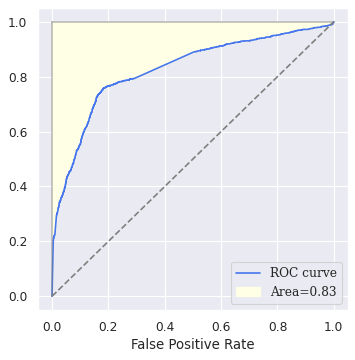

In [66]:
def roc_curve_plot(train_pred):
    FPR, TPR, thresholds = metrics.roc_curve(train_pred.y_actual, train_pred.pred_prob)
    AUC_roc = metrics.roc_auc_score(train_pred.y_actual, train_pred.pred_prob)
    plt.figure(figsize=(5,5), dpi=80)
    curve, = plt.plot(FPR, TPR) #comma is used because otherwise legend does not work
    bounds = plt.plot([0,0], [0,1], [1,1], c='grey', alpha=0.5,)
    no_skill_line, = plt.plot([0,1], c='grey', linestyle='--')
    AUC_curve = plt.fill_between(FPR, TPR, 1, color=(1,1,.9))
    plt.legend([curve, AUC_curve],
               ['ROC curve', f'Area={AUC_roc:1.2}'],
               prop={'family':'serif', 'weight':'roman'})
    plt.xlabel('False Positive Rate')
    plt.plot();
roc_curve_plot(train_pred)

### Finding optimal cutoff

#### Sensitivity - Specificity tradeoff

In [67]:
def sensitivity_specificity(model_result, X_train_C, y_train, n_points=11):
    cutoff_space = np.linspace(0,1,n_points)

    accuracy = metrics.accuracy_score
    sensitivity = metrics.recall_score
    def specificity(y_true, y_pred):
        TN, FP, FN, TP = metrics.confusion_matrix(y_true, y_pred).ravel()
        return TN / (TN+FP)
    
    train_pred_array = [make_train_pred(model_result, X_train_C, y_train, cutoff=i)
         for i in cutoff_space]
    acc_sens_spec = pd.DataFrame(
        index=cutoff_space,
        columns=['Accuracy', 'Sensitivity', 'Specificity'],
        data=[[accuracy(ich_ktff.y_actual, ich_ktff.y_pred),
            sensitivity(ich_ktff.y_actual, ich_ktff.y_pred),
            specificity(ich_ktff.y_actual, ich_ktff.y_pred)] 
                                     for ich_ktff in train_pred_array])
    return acc_sens_spec
sens_spec = sensitivity_specificity(result, X_train_C, y_train, 100)
sens_spec.tail()

,Accuracy,Sensitivity,Specificity
0.959596,0.676252,0.156123,0.996752
0.969697,0.669295,0.137064,0.997251
0.979798,0.649351,0.083131,0.998251
0.989899,0.627396,0.023925,0.999250
1.000000,0.618738,0.000000,1.000000


optimal cutoff =  0.24


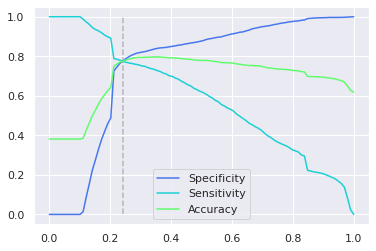

In [68]:
fig = sens_spec.plot(y=['Specificity', 'Sensitivity', 'Accuracy'])#color=[(),                              (0.27698, 0.46153, 0.93309)])
cutoff = sens_spec[np.isclose(sens_spec.Specificity, sens_spec.Sensitivity, atol=1e-2)]
cutoff = np.mean(cutoff.index)
print('optimal cutoff = ',cutoff.round(2))
plt.vlines(cutoff, 0,1, color='grey', alpha=.5, linestyle='--');

#### Precision - Recall tradeoff

optimal cutoff =  0.35


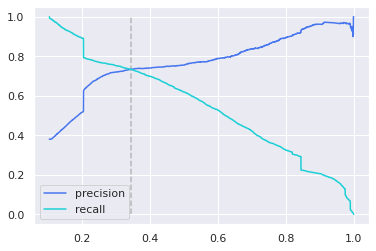

In [69]:
precision, recall, thresholds = metrics.precision_recall_curve(
                                                y_true=train_pred.y_actual,
                                                probas_pred=train_pred.pred_prob)
precision, recall = precision[:-1], recall[:-1]
p, = plt.plot(thresholds, precision)
r, = plt.plot(thresholds, recall)
#Finding optimal cutoff
cutoff = np.median(thresholds[np.isclose(precision, recall, rtol=1e-3)])
print('optimal cutoff = ',np.median(cutoff).round(2))
plt.vlines(cutoff, 0,1, color='grey', alpha=.5, linestyle='--',label='ueau')
plt.legend([p,r],['precision','recall']);

## Remodelling
This is the final model in which a somewhat optimum cutoff of `0.3` was used for classifier.  
This decision was made because after ~0.34, the precision does not increase much, recall drops drastically and that is not desirable, it means the model has become less sensitive to potential conversion of leads. 

In [70]:
X_train_C = sm.add_constant(X_train[cols])
X_test_C = sm.add_constant(X_test[cols])
scaled_model = sm.GLM(y_train, X_train_C, sm.families.Binomial())
result = scaled_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6461
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3107.8
Date:                Mon, 12 Apr 2021   Deviance:                       6215.6
Time:                        22:32:07   Pearson chi2:                 7.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1451      0.066    -32.316      0.000      -2.275      -2.015
TotalVisits                                              4.0024      1.633      2.451      0.014       0.801       7.203
Total Time Spent on Website                              4.4675      0.151     29.661      0.000       4.172       4.763
Lead Source_Olark Chat                                   0.7908      0.094      8.457      0.000       0.608       0.974
Lead Source_Reference                                    3.8385      0.198     19.338      0.000       3.449       4.228
Lead Source_Welingak Website                             5.7895      0.719      8.053      0.000       4.380       7.199
What is your current occupation_Working Professional     2.8626      0.179     16.018      0.000       2.512       3.213
========================================================================================================================
"""

### Making classifier

In [71]:
cutoff=0.30
train_results = make_train_pred(result, X_train_C, y_train, cutoff) 
test_results = make_train_pred(result, X_test_C, y_test, cutoff)

In [72]:
def get_acc_recall(train_pred: 'pd.DataFrame'):
    """
    DataFrame with columns: ['pred_prob', 'y_pred', 'y_actual']
    Returns: accuracy, sensitivity/recall
    """
    a = metrics.accuracy_score(train_pred.y_actual, train_pred.y_pred)
    s = metrics.recall_score(train_pred.y_actual, train_pred.y_pred)
    f1 = metrics.f1_score(train_pred.y_actual, train_pred.y_pred)
    print(f'Accuracy = {a:0.2} Sensitivity/Recall = {s:0.2}   f1 score = {f1:0.2}')
get_acc_recall(train_results)
get_acc_recall(test_results)

Accuracy = 0.79 Sensitivity/Recall = 0.75   f1 score = 0.74
Accuracy = 0.79 Sensitivity/Recall = 0.75   f1 score = 0.73


# Questions

####  1. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

In [124]:
coefficients = result.conf_int()
coeff_absolute_top3_indices = coefficients.abs().sort_values(by=1,ascending=False).index
coefficients.loc[coeff_absolute_top3_indices,1]

TotalVisits                                             7.203441
Lead Source_Welingak Website                            7.198532
Total Time Spent on Website                             4.762696
Lead Source_Reference                                   4.227539
What is your current occupation_Working Professional    3.212838
const                                                  -2.015019
Lead Source_Olark Chat                                  0.974057
Name: 1, dtype: float64

#### 2. What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

Top three variables that should be focust the most are 
1. `Referenced`: Leads who are referenced by some faculty etc have more chances to get converted. Hence company can have courses which are more likely to be referenced by faculties. It can also work with top faculties, to make content. 
1. `Working Professional`: In addition to the above path, company can have another set of courses which are made specifically for working professionals. More analysis can be done to find out the needs of working professionals. Courses which are for academic circles are usually larger so those courses can be cutshort into a 'made-for-professionals' version.
1. `Total Time Spent on Website`: The website's design can be improved. 


#### 3. X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

Interns should be tasked to call as many leads as possible. Addionaly, during that time, the model's threshold can be set a bit lower so that none of the potential leads are rejected. In other words, a more sensitive (true positive rate) should be deployed.

#### 4. Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

Interns should be asked to make calls and then engage with working professionals and people who can refer students.  
To understand what exactly are their needs and then keep a close loop with the data science team so that they can plan about what the next project will 
be, what kind of targeting shall be done, and for that what kind of data is needed, the sales team and other teamns can then work on to get that data.